# Unsupervised Machine Learning
## K-Means Clustering - Salary dataset

In [42]:
import pandas as pd

In [60]:
# Load CSV file

df = pd.read_csv("data_salary.csv")
print(df.sample(5))

     name  age  salary
19    Sid   41   82000
20  Abdul   41   57000
1   Nancy   29   90000
4    Gary   42  150000
13  Jerry   29   49500


In [61]:
# lets look at the shape

print(df.shape)

(22, 3)


Text(0, 0.5, 'Salary')

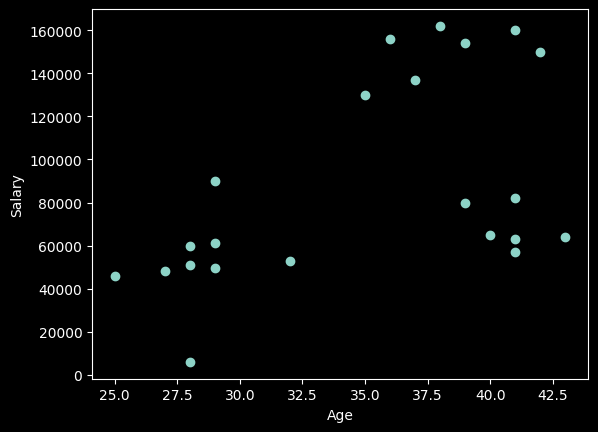

In [62]:
# Plot the salary and age
from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('dark_background')   # Black background

plt.scatter(df["age"],df['salary'])
plt.xlabel('Age')
plt.ylabel('Salary')

In [46]:
# 2

## Scale the features (Very important): 
- use min max scaler

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['age']    = scaler.fit_transform(df[['age']])
df['salary'] = scaler.fit_transform(df[['salary']])

In [64]:
# Lets look at few values

df.head()

,name,age,salary
0,Sunny,0.166667,0.000000
1,Nancy,0.222222,0.538462
2,Putin,0.222222,0.352564
3,Khan,0.166667,0.346154
4,Gary,0.944444,0.923077


In [49]:
# 3

In [65]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(df[['age','salary']])

KMeans(n_clusters=3)

In [66]:
# Find clusters for each points

clusters  = model.labels_
centroids = model.cluster_centers_

print("clusters :", clusters)
print("centroids:\n", centroids)

clusters : [0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1 1 2]
centroids:
 [[0.18518519 0.29237892]
 [0.87962963 0.40064103]
 [0.73809524 0.92216117]]


In [67]:
# add the cluster classes next to the data points
df['cluster'] = clusters
print(df)

       name       age    salary  cluster
0     Sunny  0.166667  0.000000        0
1     Nancy  0.222222  0.538462        0
2     Putin  0.222222  0.352564        0
3      Khan  0.166667  0.346154        0
4      Gary  0.944444  0.923077        2
5     Larry  0.777778  0.948718        2
6     Patel  0.722222  1.000000        2
7      Brad  0.611111  0.961538        2
8      Hari  0.555556  0.794872        2
9   Ashwani  0.666667  0.839744        2
10      Tom  0.000000  0.256410        0
11   Arnold  0.111111  0.269231        0
12   Zaveri  0.166667  0.288462        0
13    Jerry  0.222222  0.278846        0
14    Singh  0.388889  0.301282        0
15   Dipika  0.833333  0.378205        1
16   Sharma  0.888889  0.365385        1
17  Timothy  1.000000  0.371795        1
18     Alia  0.777778  0.474359        1
19      Sid  0.888889  0.487179        1
20    Abdul  0.888889  0.326923        1
21    David  0.888889  0.987179        2


In [53]:
# 4

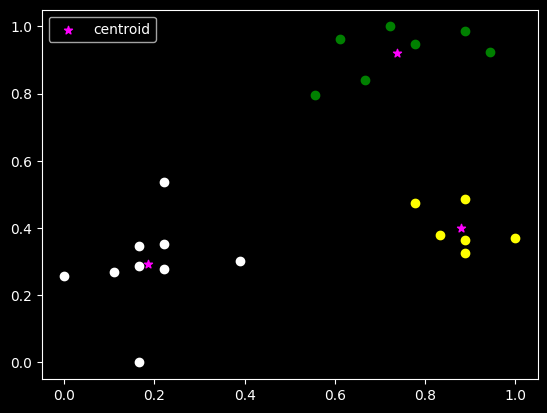

In [68]:
# Plot the points and centroid
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['age'], df1['salary'], color='white')
plt.scatter(df2['age'], df2['salary'], color='yellow')
plt.scatter(df3['age'], df3['salary'], color='green')

plt.scatter(centroids[:,0], centroids[:,1], 
            color='magenta', marker='*', label='centroid')


plt.legend()

### Elbow Plot: Find optimal number of clusters

In [69]:
# Within Cluster Sum Of Squares(WCSS): AKA Sum of Squared Errors (SSE)
WCSS = []
k_rng = range(1,10)
for k in k_rng:
    model = KMeans(n_clusters=k)
    model.fit(df[['age','salary']])
    WCSS.append(model.inertia_)

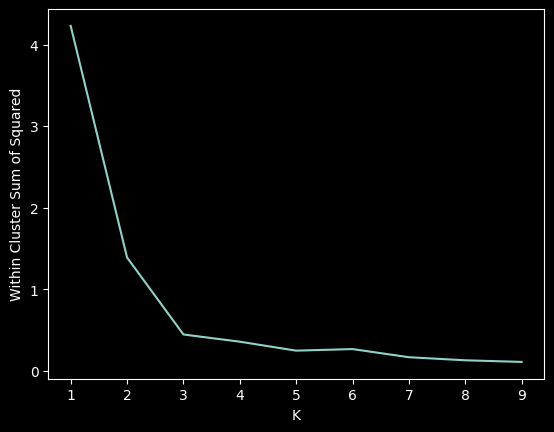

In [70]:
# Now plot the 
plt.xlabel('K')
plt.ylabel('Within Cluster Sum of Squared')
plt.plot(k_rng, WCSS)

## K=3 seems good number for clusters